This is a study following another study with the same dataset. It was previously used with a Linear Regression model to try and predict the values of house prices. The same test is done in here, but with other models.

# Data Analysis

In [33]:
%pip install plotly
#%pip install cufflinks
#%pip install chart-studio

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import RobustScaler
from time import time

In [35]:
base_casa = pd.read_csv('https://drive.google.com/uc?export=download&id=1cYpnXpTiSG7grLe2D0gYNUfOFxi5aLsF')
base_casa.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [36]:
base_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


There aren't any null values in this dataframe.

In [37]:
base_casa.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [38]:
# Checking boxplot of one of the features
fig = px.box(base_casa, x="Avg. Area Income")
fig.show()

In [39]:
# Checking boxplot of the target
fig = px.box(base_casa, x="Price")
fig.show()

Removing spaces from the title of the columns is a good practice.

In [40]:
# get the name of the columns
base_casa.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [41]:
# replacing spaces for underlines for better practices
base_casa = base_casa.rename(columns={"Avg. Area Income":"Avg_Area_Income", "Avg. Area House Age":"Avg_Area_House_Age","Avg. Area Number of Rooms":"Avg_Area_Number_of_Rooms", "Avg. Area Number of Bedrooms":"Avg_Area_Number_of_Bedrooms","Area Population":"Area_Population"})
base_casa.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


The ```Address``` column doesn't have any value in this case.

In [42]:
base_casa.drop(["Address"], axis=1, inplace=True)

Checking the correlations between Price and features.

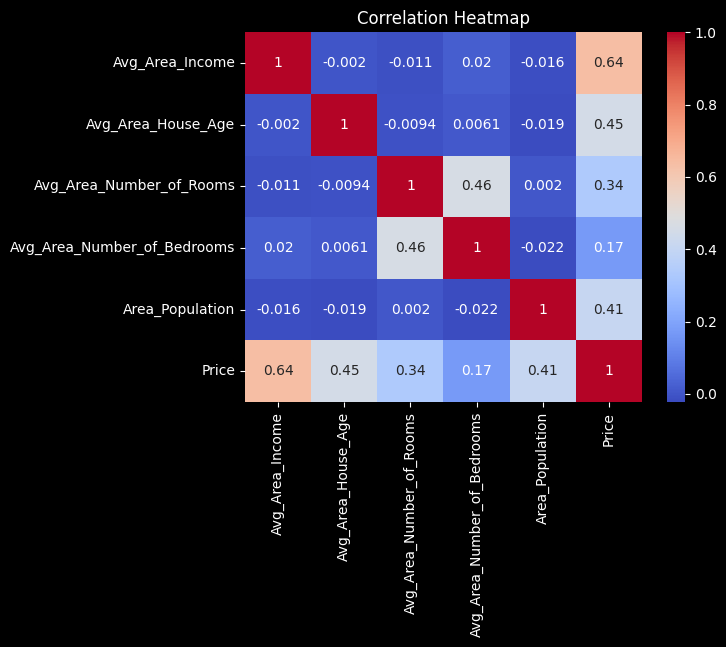

In [43]:
# Set the overall background color to dark
plt.style.use('dark_background')

# Create the heatmap
sns.heatmap(base_casa.corr(), annot=True, cmap='coolwarm')

# Optional: Customize further for cleaner look
plt.title('Correlation Heatmap', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

```Avg_Area_Income```, ```Avg_Area_House_Age```, and ```Area_Population``` are mildly correlated with ```Price```.

```Avg_Area_Number_of_Rooms``` and ```Avg_Area_Number_of_Bedrooms``` are mildly correlated with each other but weakly correlated with ```Price```.

In [44]:
base_casa.shape

(5000, 6)

We have 5000 observations.

# Modelling

In [45]:
# Separating X features and y target
X = base_casa.drop("Price", axis=1)
y = base_casa["Price"]

Something to keep in mind here, metrics for regression models:

| Metric                     | Description                                                  | When to Use                                              |
|----------------------------|--------------------------------------------------------------|-----------------------------------------------------------|
| **MAE** (Mean Absolute Error) | Average of absolute errors                                  | When you want all errors treated equally                  |
| **MSE** (Mean Squared Error)  | Average of squared errors                                    | When larger errors should be penalized more               |
| **RMSE** (Root Mean Squared Error) | Square root of MSE                                         | Like MSE, but in the same units as the target variable    |
| **R²** (R-squared / Coefficient of Determination) | Proportion of variance explained by the model | When you want to measure how well your model explains the variability |


In [46]:
class Model:
    def __init__(self, X, y, model, modelname):

        self.modelname = modelname
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

        self.model = model
        start_time = time()
        self.model.fit(X_train, y_train)
        end_time = time()
        self.training_time = end_time - start_time

        start_time = time()
        self.y_pred = self.model.predict(X_test)
        end_time = time()
        self.prediction_time = end_time - start_time

        self.train_pred_time = self.training_time + self.prediction_time

        self.r2 = r2_score(y_test, self.y_pred)

    def printr2(self):
        return print(f"{self.modelname}:\nR²: {self.r2:.4f}")

    def runtime(self):
        return print(f"Training Time: {self.training_time:.4f}; Prediction Time: {self.prediction_time:.4f}; Total: {self.train_pred_time:.4f}")

In [47]:
dtree = Model(X, y, DecisionTreeRegressor(), 'Decision Tree')
ens = Model(X, y, RandomForestRegressor(), 'Random Forest')

dtree.printr2()
ens.printr2()

Decision Tree:
R²: 0.7690
Random Forest:
R²: 0.8874


Its visible the improvement in accuracy when using Random Forest, compared to Decision Tree

In [48]:
dtree.runtime()
ens.runtime()

Training Time: 0.0588; Prediction Time: 0.0024; Total: 0.0612
Training Time: 6.0398; Prediction Time: 0.0614; Total: 6.1012


Let's check if there is any bias in the model with cross-validation.

In [49]:
class CrossVal:
    def __init__(self, scaler, X, y, model, modelname):

        self.pl = Pipeline([(modelname, model)])

        start_time = time()
        scores = cross_val_score(self.pl, X, y, cv=5, scoring='r2')
        end_time = time()
        training_time = end_time - start_time #measure fitting time

        print(f"{modelname}")
        print(f"- R² score:\n  - {scores.mean():.4f}")
        print(f"- Training + Predictions Time:\n  - {training_time:.4f}")

        self.init = [0,0] #the class initializes with 0,0 and goes to 1 when cross_validate or cross_val_predict is called

    def cross_validate(self):
        if self.init[0] == 0: #this was done so the model doesn't train itself everytime cross_validate() is called
            self.results = cross_validate(self.pl, X, y, cv=5, scoring=['r2', 'neg_mean_absolute_error'], return_train_score=True)
            self.init[0] = 1
        return print(f"Test R² scores:  {self.results['test_r2']} \nTrain R² scores: {self.results['train_r2']}")

    def get_ypred(self):
        if self.init[1] == 0: #this was done so the model doesn't train itself everytime cross_val_predict() is called
            self.y_pred = cross_val_predict(self.pl, X, y, cv=5)
            self.init[1] = 1
        return self.y_pred

In [50]:
dtree_cv = CrossVal(RobustScaler(), X, y, DecisionTreeRegressor(), 'Decision Tree')

Decision Tree
- R² score:
  - 0.7503
- Training + Predictions Time:
  - 0.3819


Doesn't look like there is any bias. The results are very similar.

The ```Avg_Area_Number_of_Bedrooms``` has a very low correlation with ```Prices``` so it's worth to check if dropping this column entirely makes the model better.

In [51]:
X_2 = base_casa.drop(["Price", 'Avg_Area_Number_of_Bedrooms'], axis=1)

dtree = Model(X_2, y, DecisionTreeRegressor(), 'Decision Tree')
ens = Model(X_2, y, RandomForestRegressor(), 'Random Forest')

dtree.printr2()
ens.printr2()

Decision Tree:
R²: 0.7588
Random Forest:
R²: 0.8876


We can see here that by dropping the ```Avg_Area_Number_of_Bedrooms```, the model performed slightly better, because the correlation was very low (0.17).

We can also see that Random Forest still performs better than Decision Tree.

In [52]:
dtree_cv = CrossVal(RobustScaler(), X_2, y, DecisionTreeRegressor(), 'Decision Tree')
ens_cv = CrossVal(RobustScaler(), X_2, y, RandomForestRegressor(), 'Random Forest')

Decision Tree
- R² score:
  - 0.7657
- Training + Predictions Time:
  - 0.2817
Random Forest
- R² score:
  - 0.8847
- Training + Predictions Time:
  - 20.1714


Cross-validation results in similar values, so there isn't any considerable bias in the dtree.

In [53]:
dtree_cv.cross_validate()

Test R² scores:  [0.76113849 0.76728617 0.74362031 0.76526634 0.71596933] 
Train R² scores: [1. 1. 1. 1. 1.]


In [54]:
ens_cv.cross_validate()

Test R² scores:  [0.88541942 0.88675364 0.88006994 0.8846728  0.87688898] 
Train R² scores: [0.98391675 0.98348753 0.98436936 0.98310074 0.98406796]


We can see here that Decision Tree fits perfectly to the training data but dips considerably when trying to predict test data.

Random Forest, by being a more complex model, alleviates this issue, granting less of a gap between train score and test score.

This can probably be improved by tuning the hyperparameters.

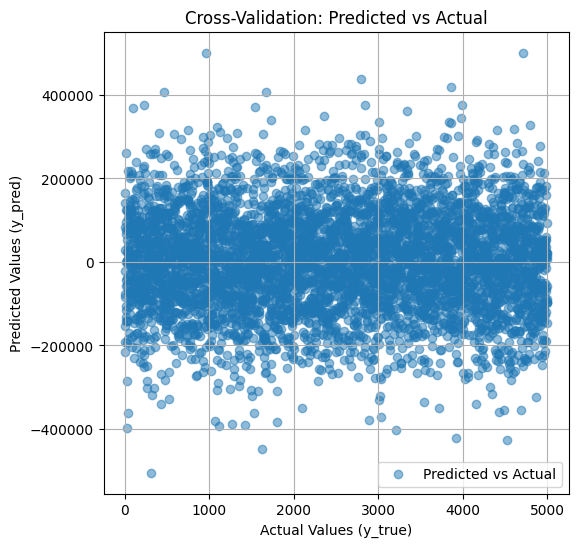

In [55]:
y_pred = ens_cv.get_ypred()

# Compute errors (residuals)
errors = y - y_pred  # Difference between actual and predicted values

xaxis = [i for i in range(1, len(errors)+1, 1)]

# Create scatter plot
plt.style.use('default')
plt.figure(figsize=(6, 6))
plt.scatter(xaxis, errors, alpha=0.5, label="Predicted vs Actual")

# Labels and title
plt.xlabel("Actual Values (y_true)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Cross-Validation: Predicted vs Actual")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

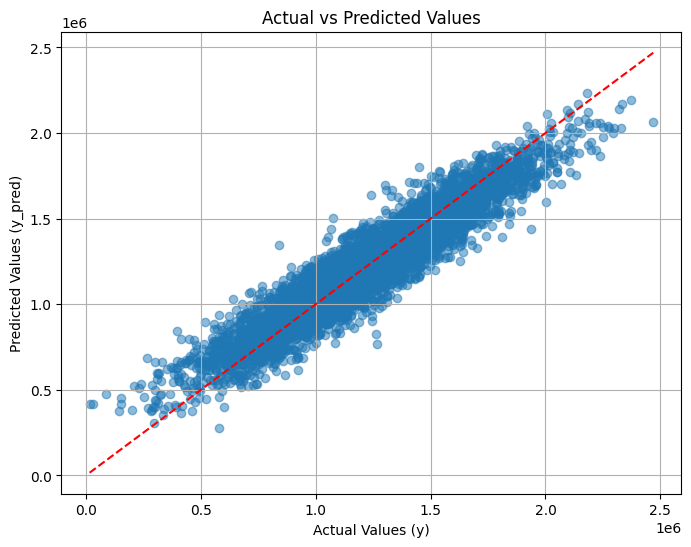

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)  # Plot actual vs predicted
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--') # Plot the regression line
plt.xlabel("Actual Values (y)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

In [57]:
# Print error statistics
print("Mean Error:", np.mean(errors))
print("Standard Deviation of Errors:", np.std(errors))

Mean Error: 951.3208461419791
Standard Deviation of Errors: 121029.82702388828


In [58]:
results_df = pd.DataFrame({'y': y, 'y_pred': y_pred, 'residuals': errors})

# Display the DataFrame
results_df

,y,y_pred,residuals
0,1.059034e+06,1.274916e+06,-215882.883837
1,1.505891e+06,1.476869e+06,29022.056281
2,1.058988e+06,1.250538e+06,-191550.354549
3,1.260617e+06,1.094458e+06,166158.876958
4,6.309435e+05,7.852254e+05,-154281.925598
...,...,...,...
4995,1.060194e+06,1.039289e+06,20905.033271
4996,1.482618e+06,1.461385e+06,21232.870872
4997,1.030730e+06,1.119082e+06,-88352.290330
4998,1.198657e+06,1.294477e+06,-95819.686609


In [59]:
df_residuals = base_casa.join(results_df)

df_residuals.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,y,y_pred,residuals
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,1.059034e+06,1.274916e+06,-215882.883837
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,1.505891e+06,1.476869e+06,29022.056281
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,1.058988e+06,1.250538e+06,-191550.354549
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,1.260617e+06,1.094458e+06,166158.876958
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,6.309435e+05,7.852254e+05,-154281.925598


In [60]:
df_residuals[df_residuals['residuals'] > 0.2]

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,y,y_pred,residuals
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,1.505891e+06,1.476869e+06,29022.056281
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,1.260617e+06,1.094458e+06,166158.876958
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,7.988695e+05,6.575920e+05,141277.508135
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,1.545155e+06,1.461724e+06,83430.495822
13,73163.663441,6.919535,5.993188,2.27,32326.123139,1.291332e+06,1.291332e+06,1.215850e+06,75481.678626
...,...,...,...,...,...,...,...,...,...
4989,47965.406896,5.694638,7.363327,5.40,46071.947337,8.852050e+05,8.852050e+05,8.719993e+05,13205.728589
4991,74102.191890,5.657841,7.683993,3.13,24041.270592,1.263721e+06,1.263721e+06,1.170449e+06,93271.540423
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,1.060194e+06,1.039289e+06,20905.033271
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,1.482618e+06,1.461385e+06,21232.870872


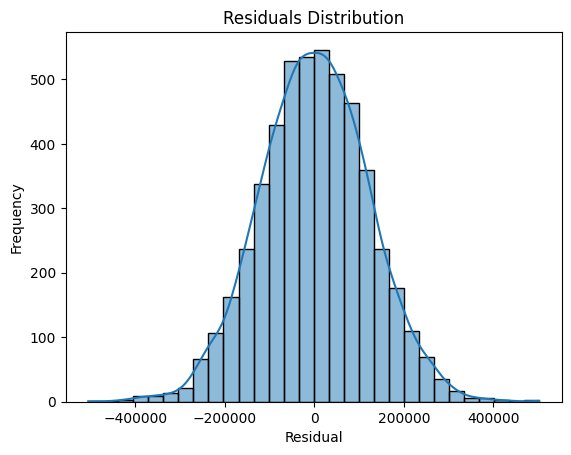

In [61]:
sns.histplot(df_residuals["residuals"], bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

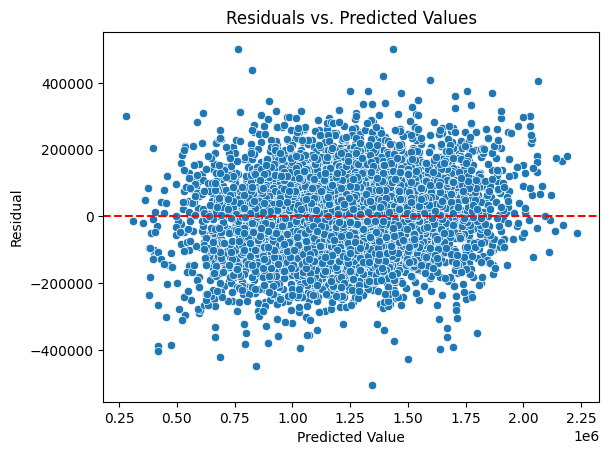

In [62]:
sns.scatterplot(x=df_residuals["y_pred"], y=df_residuals["residuals"])
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Value")
plt.ylabel("Residual")
plt.show()

Conclusion:

This study showed the comparison between Decision Tree and Random Forest. While the latter can be considered a straight evolution, granting better accuracy, untrained data prediction and less overfitting, it should also be worth noting the time it takes to train it is way higher.